In [11]:
# Imports
!pip install folium
import pandas as pd
import numpy as np
import folium
import matplotlib.pylab as plt
from folium.plugins import HeatMap, HeatMapWithTime


# Importing the data and looking at it.
df = pd.read_csv("master.csv", sep=',')
display(df)

# Put in some steps to replace Nan's -- etc as part of cleaning data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


# Exploring the given dataset
Now that we have the dataset on suicide rates, we can try and explore some of the possible factors that help contribute to suicide rate. We run the pandas describe funtion just to get a general sense of what numerical data is contained in the dataframe and what ranges of values are in them. 

In [2]:
display(df.describe())

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


The description gives us some prelimiary insight into the suicide rate data. It helps us get an idea of the range of years that this data covers, which is 1985-2016. It also gives us the <b>population</b> numbers for each of the countries involved, the suicides per 100 thousand of the population, and the <b>gdp per capita</b>. We can explore these factors further, to see their impact on the number of suicides that occur and to try and eventually be able to see which factor affects the number of suicides the most. We'll also look to explore the affect of the given <b>year</b> on suicide numbers. We also use the categorical data, like the <b> generation </b> of people and the <b>country</b> that the suicide is being reported in.       

# 2.1 Looking at suicide numbers vs years
As per [this](https://ourworldindata.org/suicide#how-have-suicide-rates-changed) report, build from data provided by the World Health Organization suggests, suicide rates have been on the rise all over the world. To corraborate this, we've decided to look at the total number of suicides around the world(that have been reported) and plot them against the years they were reported in. 

We first group all the data by the year column

In [2]:
a =df.groupby(['year']).sum().reset_index()
display(a)

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1985,116063,1008600086,6811.89,310.428,3508548
1,1986,120670,1029909613,6579.84,0.000,4104636
2,1987,126842,1095029726,7545.45,0.000,5645760
3,1988,121026,1054094424,7473.13,0.000,5870508
4,1989,160244,1225514347,8036.54,0.000,6068424
5,1990,193361,1466620100,9878.75,429.480,7531260
6,1991,198020,1489988384,10321.06,0.000,7782096
7,1992,211473,1569539447,10528.88,0.000,8195232
8,1993,221565,1530416654,10790.29,0.000,8231796
9,1994,232063,1548749372,11483.79,0.000,9438756


We then plot the suicide numbers against the years they occurred in. 

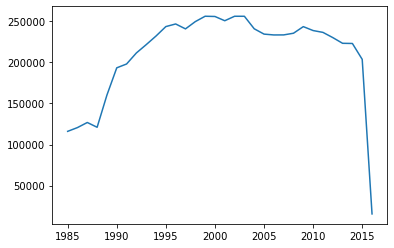

In [3]:
plt.plot(a['year'],a['suicides_no'])
# looking at the plot \, suicide rates in 2016 are unrealisitcally low, as well as population. 
# Must be incomplete data - > Disregarding the year 2016

From the graph, there is an extreme dip after the year 2015, for the year 2016. To dig some more, lets see a count of data for each column using the pandas group by 

In [7]:
a =df.groupby(['year']).count().reset_index()
display(a.tail())

,year,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27,2012,972,972,972,972,972,972,972,936,972,972,972
28,2013,960,960,960,960,960,960,960,924,960,960,960
29,2014,936,936,936,936,936,936,936,900,936,936,936
30,2015,744,744,744,744,744,744,744,0,744,744,744
31,2016,160,160,160,160,160,160,160,0,160,160,160


There is clearly some data missing for 2016, as there seems are only 170 entries for 2016, compared to the volumes for the years before. Research from the previous report contradicts that finding, so there must be some missing data. For that reason, we will omit 2016 from our observations and observe suicide data from 1985-2015 instead. 
<br>
<br>
Note that the HDI column also shows incosistent count values, hence we will not consider it when later analysing the factors behind suicide numbers. Also, from the [definition](https://www.investopedia.com/terms/h/human-development-index-hdi.asp) of HDI, it is calculated by looking at life expectancies. Hence, analyzing it as a factor for suicide numbers would result in falsely positive results, as suicide numbers affect the calculation of HDI. 
<br>
<br>
Now we'll remove the year 2016 from our data frame, then replot the graph.  

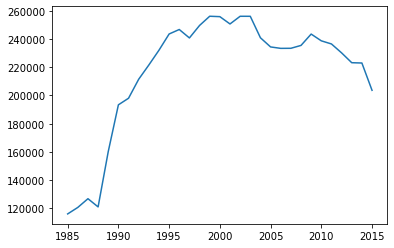

In [8]:
is_not_2016 =  df['year']!=2016
df = df[is_not_2016]
a =df.groupby(['year']).sum().reset_index()
plt.plot(a['year'],a['suicides_no'])

# 2.2 Looking at Suicide numbers vs GDP


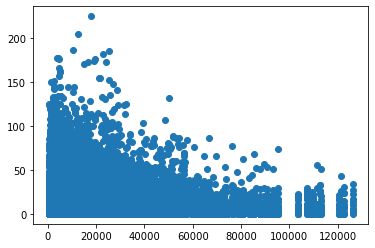

In [24]:
# EDA 2:
# Comparing the GDP and suicides per 100
plt.scatter(df['gdp_per_capita ($)'],df['suicides/100k pop'])

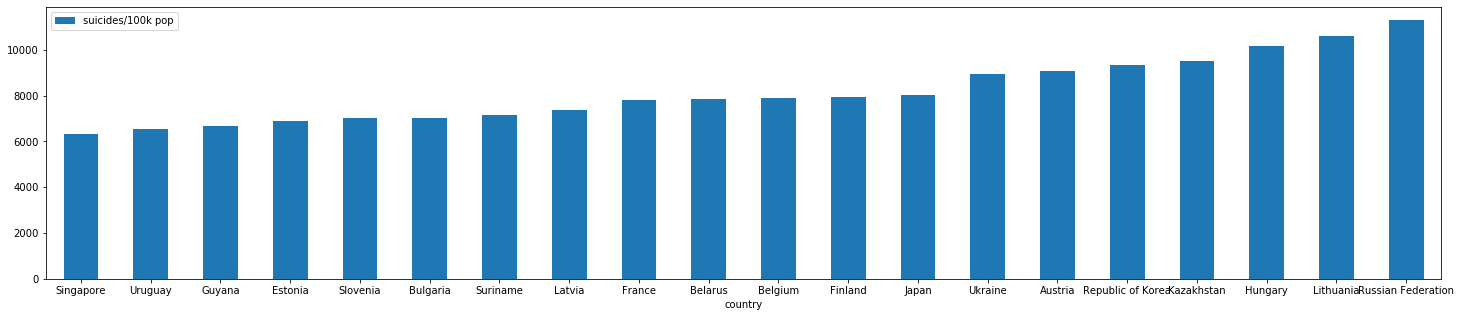

In [25]:
# EDA 3
##Top countries that have the most suicide rates
#----------------------------------------------
#group by based on countries
groupByCountry = df.groupby(['country']).sum().reset_index()
#sort based on suicide rates
groupByCountry = groupByCountry.sort_values(by=['suicides/100k pop'])
groupByCountry = groupByCountry.tail(20)
#plot country vs. suicide rate compared with population size
ax = groupByCountry.plot.bar(x='country',y='suicides/100k pop', rot=0, figsize=(25,5))

In [12]:
# Dataframe with countries and total number of sucides 
totalSuicidesByCountries = df.groupby(['country']).sum().reset_index()
totalSuicidesByCountries = totalSuicidesByCountries.drop(columns = ['year','population','suicides/100k pop','HDI for year','gdp_per_capita ($)'])

# Different dataframe named, countryLocation, to get location of all countries
countryLocation = pd.read_csv("countries.csv", sep=',')
countryLocation = countryLocation.drop(columns= ['country'])
countryLocation = countryLocation.rename(columns={"name":"country"})

# Merging two dataframes to find latitude and Longitude of all countries
totalSuicidesByCountries =(pd.merge(totalSuicidesByCountries,countryLocation, on='country', how='inner'))
display(totalSuicidesByCountries)

# plotting data on to the maps
map = folium.Map(location=[0, 0], zoom_start=1)
totalSuicidesByCountries.apply(lambda row:folium.Circle(
                                                radius=[row["suicides_no"]], 
                                                location=[row["latitude"],row["longitude"]],
                                                popup='The Waterfront',
                                                color='blue',
                                                fill=False,
                                                ).add_to(map), axis=1)

map

,country,suicides_no,latitude,longitude
0,Albania,1970,41.153332,20.168331
1,Antigua and Barbuda,11,17.060816,-61.796428
2,Argentina,82219,-38.416097,-63.616672
3,Armenia,1905,40.069099,45.038189
4,Aruba,101,12.521110,-69.968338
5,Australia,70111,-25.274398,133.775136
6,Austria,50073,47.516231,14.550072
7,Azerbaijan,1656,40.143105,47.576927
8,Bahamas,93,25.034280,-77.396280
9,Bahrain,463,25.930414,50.637772


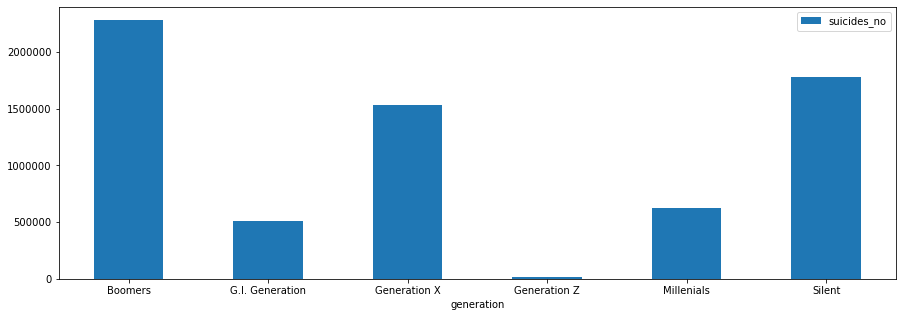

In [26]:
# EDA 4
# Plot Generations Vs. Suicide Number
#---------------------------------------------
#group by based on generation type
groupByGen = df.groupby(['generation']).sum().reset_index()
#plot generation vs. suicides_no
ax = groupByGen.plot.bar(x='generation', y = 'suicides_no', rot=0, figsize=(15,5))